# Quantitative Evaluation

## Data: Alabama enrollment

In [1]:
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
cores = sns.color_palette(n_colors=21)

In [3]:
ala = pd.read_csv('data/Enrollments.csv', sep=';', index_col=[0], parse_dates=[0])
col = ala.keys().to_list()[0]

### Pre-processing: smooth series

In [4]:
# decomposition: apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ala[col].values)


# Select MFIs without trending and noise behavior 
df_fts = pd.DataFrame(ala[col].copy())
df_fts[col] = ala

col_imf = 'residue'
df_fts[col_imf] = imfs[1]+imfs[2]

shape imf:  (3, 22)


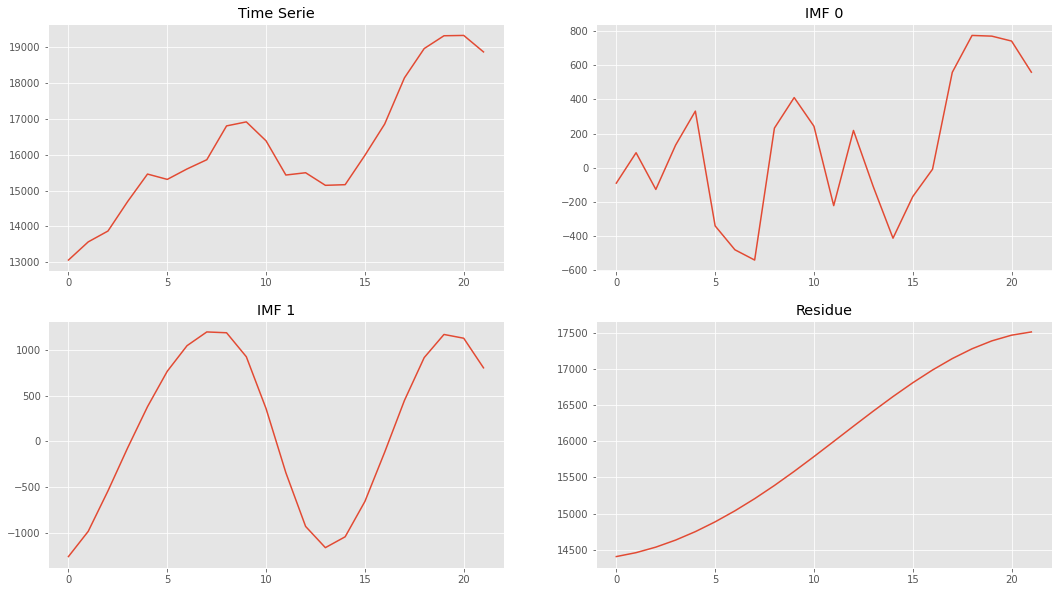

In [8]:
fts_util.plot_imfs(df_fts[col].values, imfs, fs=(18,10))

### Run My Appoach + Chen Model

/home/ds/app/FTS/Models/MV_Chen.py:249: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.method is 'fuzzy':
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 2.39
------------------------------
MAE.......: 387.62
------------------------------
MSE.......: 236883.59
------------------------------
RMSE......: 486.71
------------------------------
DTW.......: 5559.056906165184


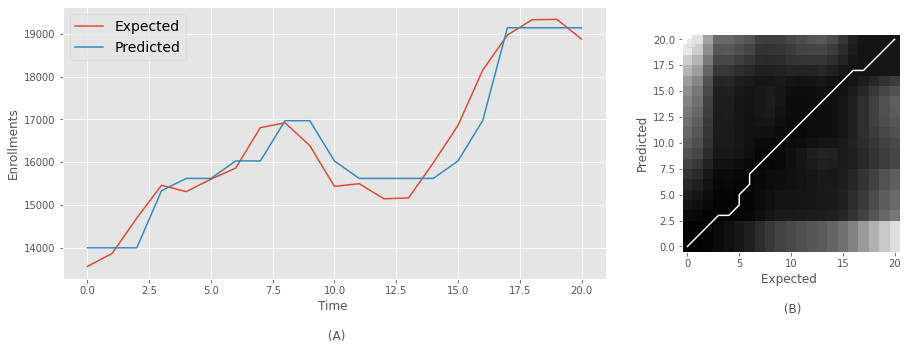

(2.39, 387.62, 236883.59, 486.71, 5559.056906165184)

In [3]:
from FTS.Models.MV_Chen import STFMV_Convencional_Chen
model = STFMV_Convencional_Chen()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

### Run My Appoach +  Lee Model

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 2.41
------------------------------
MAE.......: 389.9
------------------------------
MSE.......: 219025.4
------------------------------
RMSE......: 468.0
------------------------------
DTW.......: 6482.663730967666


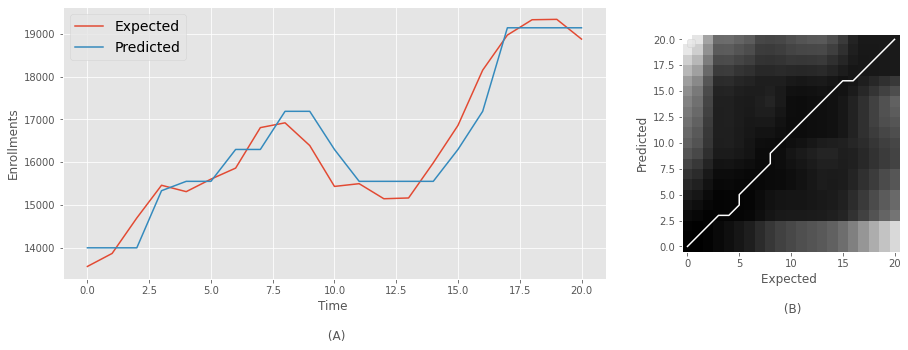

(2.41, 389.9, 219025.4, 468.0, 6482.663730967666)

In [4]:
from FTS.Models.MV_Lee import STFMV_Convencional_Lee
model = STFMV_Convencional_Lee()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

## Data: TAIEX 1992 stock index

In [5]:
taiex = pd.read_csv('data/TAIEX_1992.csv', index_col=[0])
taiex.head()

,values
Time,
01/04/1992,4612.97
01/06/1992,4692.17
01/07/1992,4718.81
01/08/1992,4772.61
01/09/1992,4803.51


### Pre-processing: smooth series

shape imf:  (5, 281)


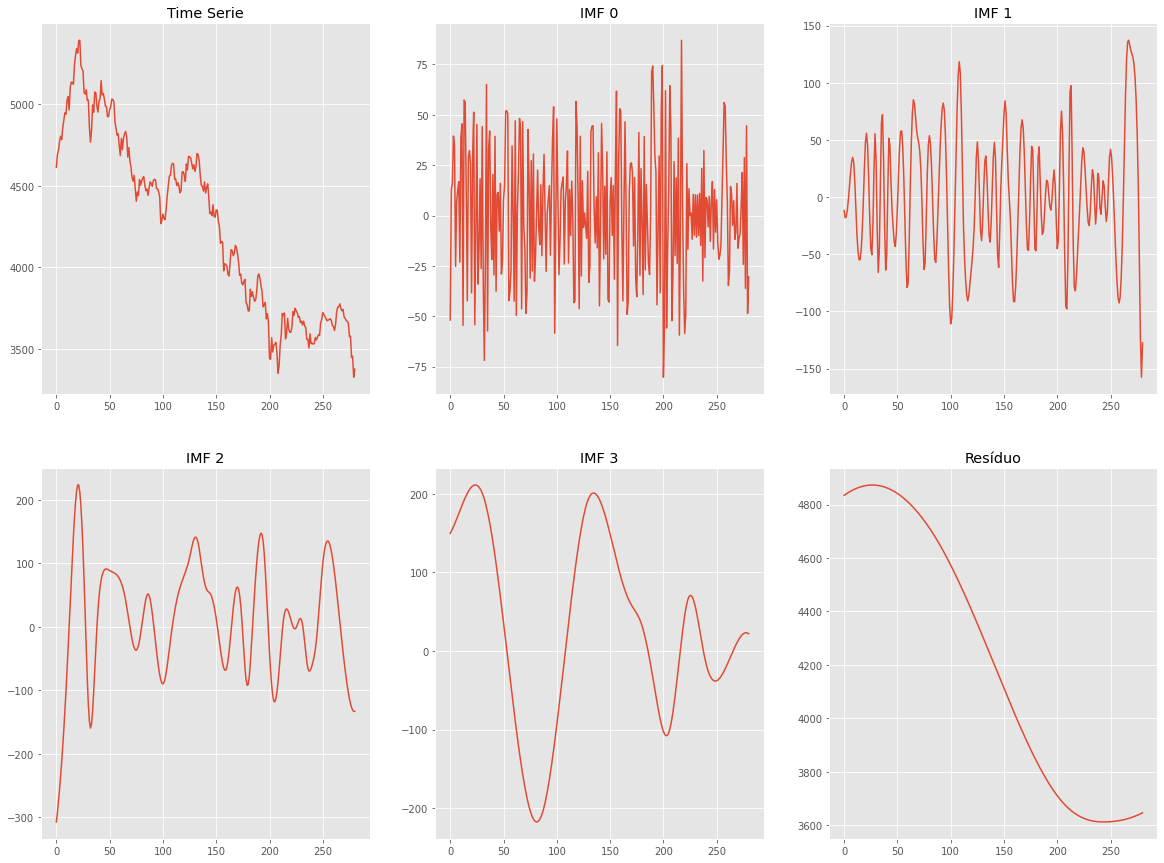

In [6]:
col = taiex.keys().to_list()[0]

# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(taiex[col].values)

fts_util.plot_imfs(taiex[col].values, imfs, fs=(20,15))

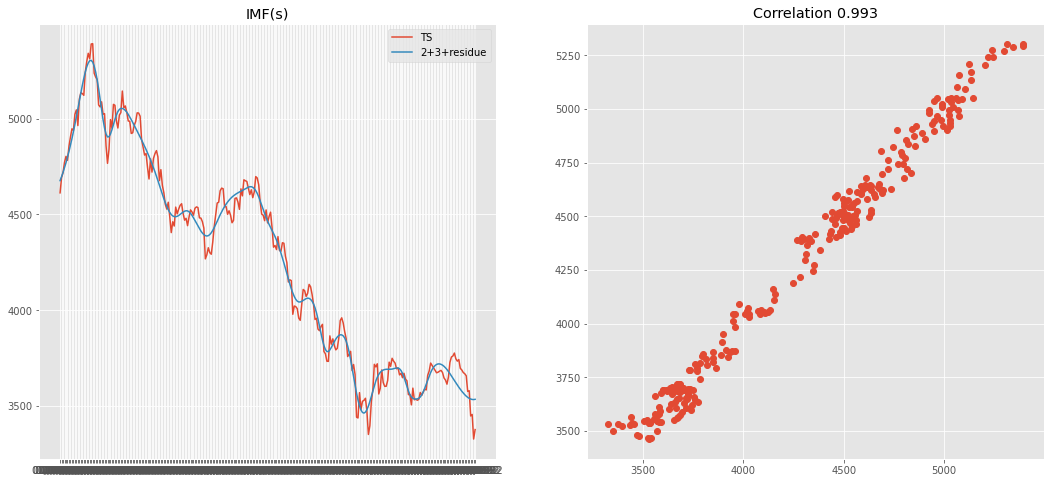

In [7]:
# Select MFIs without trending and noise behavior 

df_fts = pd.DataFrame(taiex[col].copy())
df_fts[col] = taiex

col_imf = '2+3+residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

corr = round(np.corrcoef(df_fts[col], df_fts[col_imf])[0,1], 3)

# PLOT 
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121)
ax.plot(df_fts[col], label='TS')
ax.plot(df_fts[col_imf], label=col_imf)
ax.set_title('IMF(s)')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(df_fts[col], df_fts[col_imf], 'o')
ax.set_title('Correlation {}'.format(corr))

plt.show()

In [8]:
df_fts[col].shape, df_fts[col_imf].shape

((281,), (281,))

### Run My Appoach + Chen Model

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 2.27
------------------------------
MAE.......: 95.52
------------------------------
MSE.......: 13610.31
------------------------------
RMSE......: 116.66
------------------------------
DTW.......: 23422.409174008688


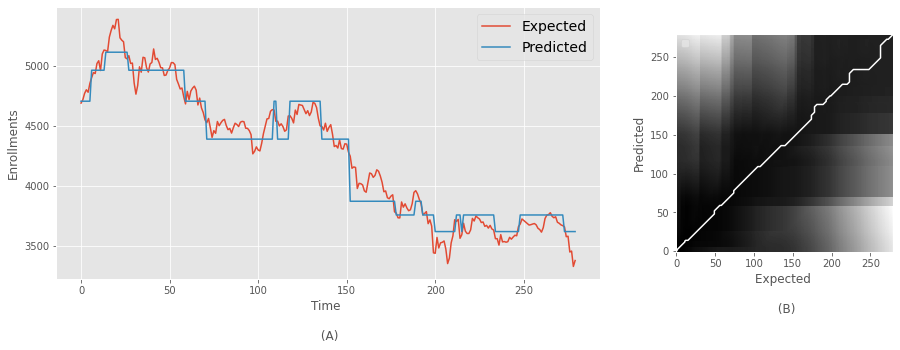

(2.27, 95.52, 13610.31, 116.66, 23422.409174008688)

In [9]:
from FTS.Models.MV_Chen import STFMV_Convencional_Chen
model = STFMV_Convencional_Chen()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

### Run My Appoach + Lee Model 

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 1.68
------------------------------
MAE.......: 71.5
------------------------------
MSE.......: 8379.14
------------------------------
RMSE......: 91.54
------------------------------
DTW.......: 18273.640228973018


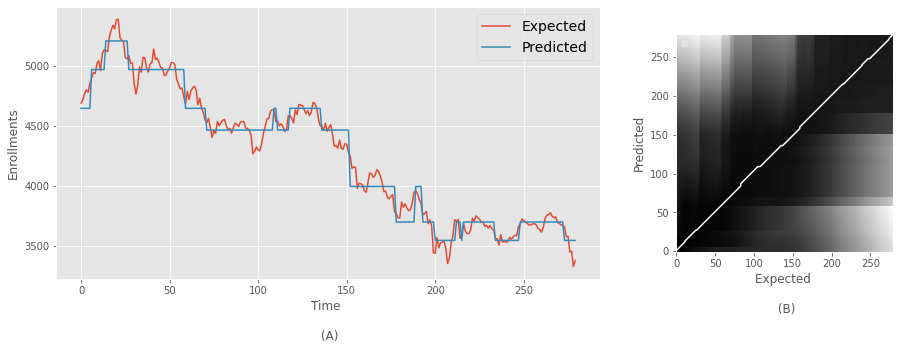

(1.68, 71.5, 8379.14, 91.54, 18273.640228973018)

In [10]:
from FTS.Models.MV_Lee import STFMV_Convencional_Lee
model = STFMV_Convencional_Lee()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

## Data: DAX Stock Index

shape imf:  (5, 182)


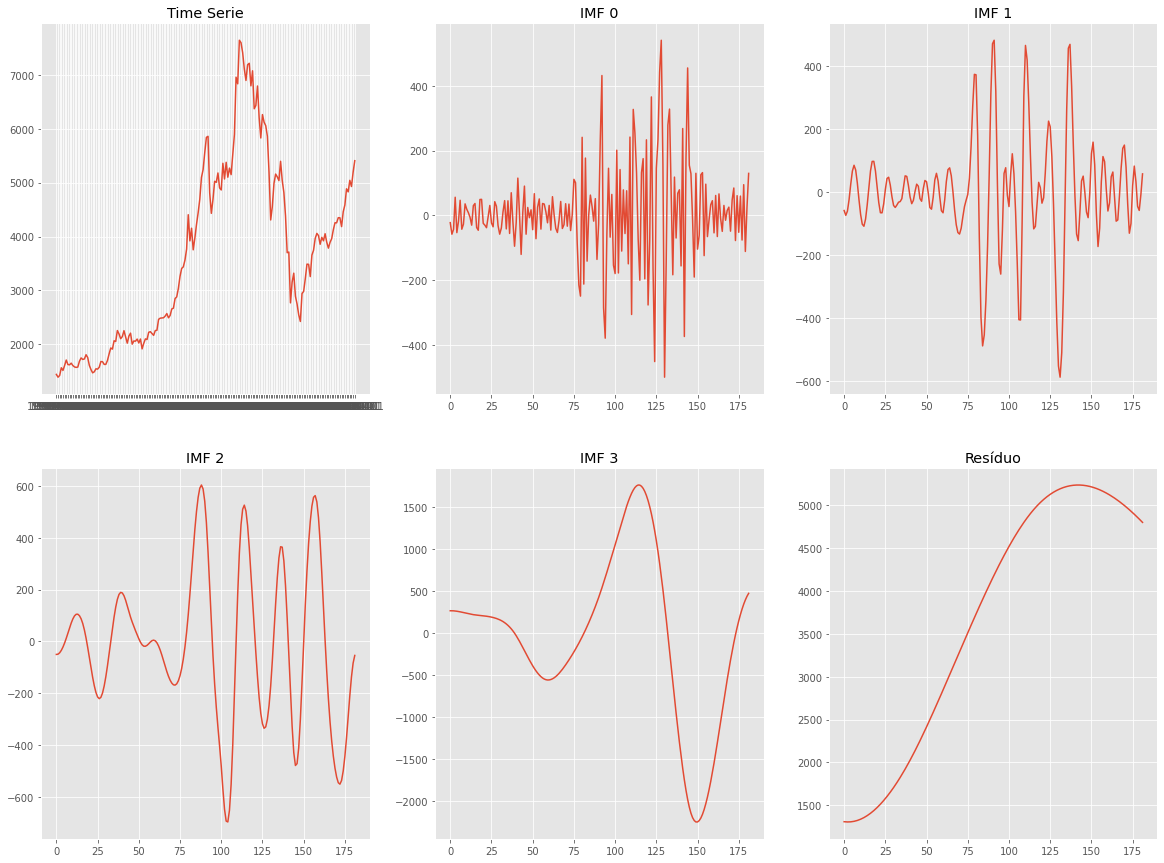

In [11]:
ts = pd.read_csv('data/GDAXI.csv', index_col=[0])
ts.head()

col = 'Close'

# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ts[col].values)

fts_util.plot_imfs(ts[col], imfs, fs=(20,15))

### Pre-processing: smooth series

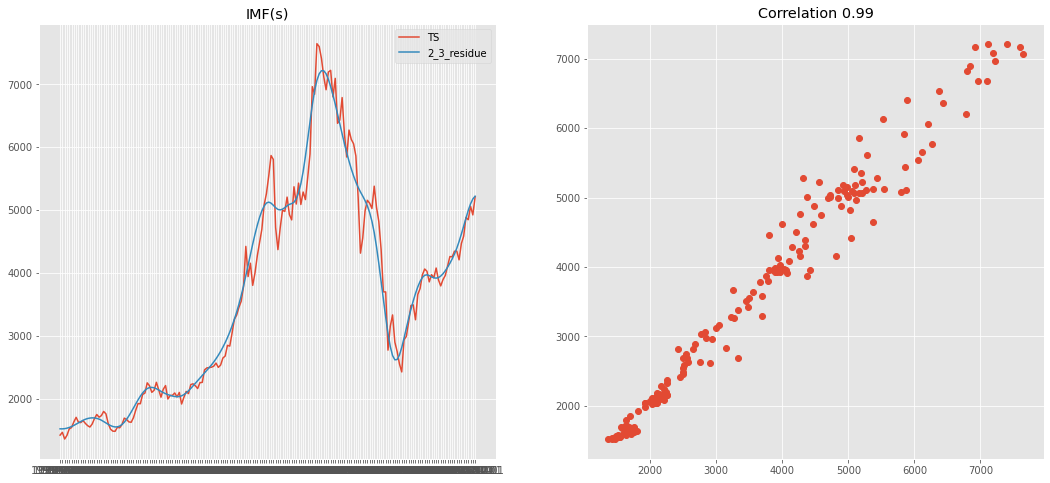

In [12]:
# Select MFIs without trending and noise behavior

df_fts = pd.DataFrame(ts[col].copy())
df_fts[col] = ts.values
df_fts.head()


col_imf = '2_3_residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

corr = round(np.corrcoef(ts[col], df_fts[col_imf])[0,1], 3)

# PLOT 
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121)
ax.plot(df_fts[col], label='TS')
ax.plot(df_fts[col_imf], label=col_imf)
ax.set_title('IMF(s)')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(df_fts[col], df_fts[col_imf], 'o')
ax.set_title('Correlation {}'.format(corr))

plt.show()

### Run My Appoach + Chen Model

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 11.61
------------------------------
MAE.......: 333.44
------------------------------
MSE.......: 177746.66
------------------------------
RMSE......: 421.6
------------------------------
DTW.......: 47394.33698784973


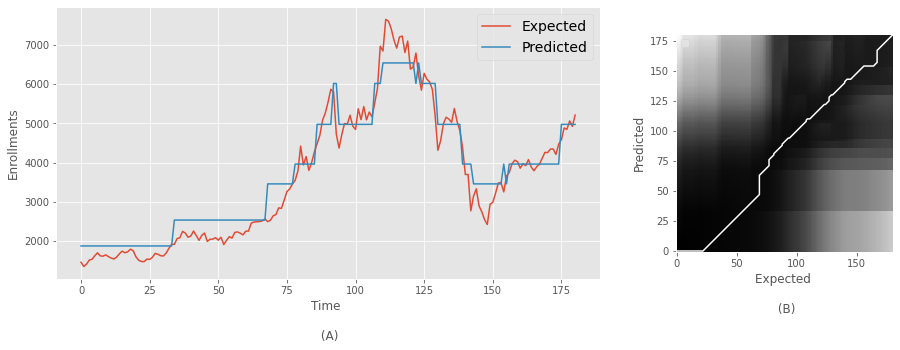

(11.61, 333.44, 177746.66, 421.6, 47394.33698784973)

In [13]:
from FTS.Models.MV_Chen import STFMV_Convencional_Chen
model = STFMV_Convencional_Chen()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()

### Run My Appoach + Lee Model

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 6.76
------------------------------
MAE.......: 233.28
------------------------------
MSE.......: 107032.84
------------------------------
RMSE......: 327.16
------------------------------
DTW.......: 36280.88811762968


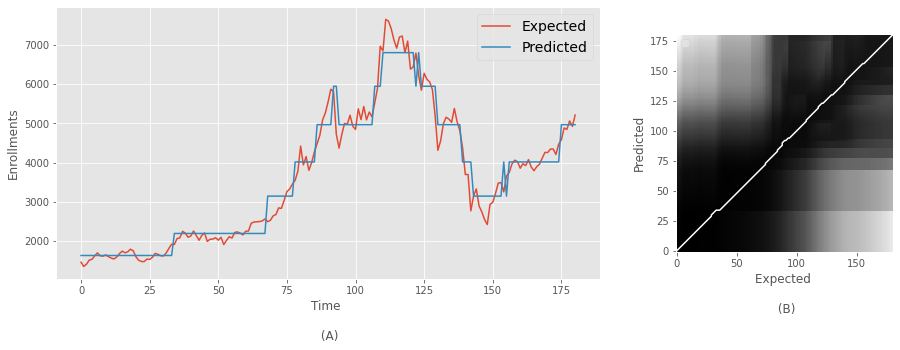

(6.76, 233.28, 107032.84, 327.16, 36280.88811762968)

In [14]:
from FTS.Models.MV_Lee import STFMV_Convencional_Lee
model = STFMV_Convencional_Lee()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()